# Linear Classification with Cross Entropy Loss

In this exercise, you will implement and train a linear classifier using cross entropy loss. We will reuse most of the code (and the cells) that we developed in Task 1.

Please complete all cells and answer questions asked in the cells if you want to get a full grade.


In [1]:
# Run some setup code for this notebook.

import random
import numpy as np
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Loading the MNIST Dataset

MNIST (http://yann.lecun.com/exdb/mnist/) is one of the popular datasets used for testing machine learning models. It contains hand-written digits as grayscale images with 28x28 resolution. There are 60,000 samples for training (10,000 of which is usually used for validation), and 10,000 for testing. Although there are more challenging datasets available, MNIST is a good starting point for testing early versions of the models and as a sanity check.

Since more challenging datasets require more memory and lead to bigger models that require more computational power, we will stick with the MNIST dataset for the first HW.

In [2]:
# First run the "get_data.sh" under metu/data/ in your terminal.
# Then this cell will load the raw MNIST data.
#
#
from ceng783.utils import load_mnist
mnist_file = 'ceng783/data/mnist.pkl.gz'
X_train, y_train, X_val, y_val, X_test, y_test = load_mnist(mnist_file)

# As a sanity check, we print out the size of the training and test data.
print 'Training data shape: ', X_train.shape
print 'Training labels shape: ', y_train.shape
print 'Validation data shape: ', X_val.shape
print 'Validation labels shape: ', y_val.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape

Training data shape:  (50000, 784)
Training labels shape:  (50000,)
Validation data shape:  (10000, 784)
Validation labels shape:  (10000,)
Test data shape:  (10000, 784)
Test labels shape:  (10000,)


In [3]:
# Subsample the data for faster experiments in this exercise.
num_training = 10000
num_validation = 1000
num_test = 1000

X_train = X_train[1:num_training]
y_train = y_train[1:num_training]

X_val = X_val[1:num_validation]
y_val = y_val[1:num_validation]

X_test = X_test[1:num_test]
y_test = y_test[1:num_test]

print 'Train data shape: ', X_train.shape
print 'Train labels shape: ', y_train.shape
print 'Validation data shape: ', X_val.shape
print 'Validation labels shape: ', y_val.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape

Train data shape:  (9999, 784)
Train labels shape:  (9999,)
Validation data shape:  (999, 784)
Validation labels shape:  (999,)
Test data shape:  (999, 784)
Test labels shape:  (999,)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


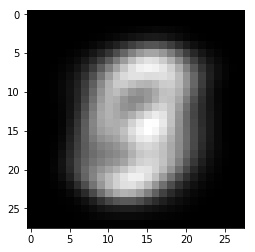

In [4]:
# Preprocessing: subtract the mean image
# first: compute the image mean based on the training data
mean_image = np.mean(X_train, axis=0)

# second: subtract the mean image from train and test data
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image

print mean_image[:10] # print a few of the elements
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((28,28))) # visualize the mean image

In [5]:
# third: append the bias dimension of ones (i.e. bias trick) so that our SVM
# only has to worry about optimizing a single weight matrix W.
# Also, lets transform both data matrices so that each image is a column.
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

print X_train.shape, X_val.shape, X_test.shape

(9999, 785) (999, 785) (999, 785)


## Linear Classifier with Cross-entropy Loss

Your code for this section will all be written inside **ceng783/linear_classification.py**. 

Fill in the loss calculation in the `vectorized_xentropy_loss' function.

In [6]:
# Evaluate the naive implementation of the loss we provided for you:
from ceng783.linear_classification import *

input_size = X_train[0].shape[0]
output_size = 10

LC = LinearClassifier(input_size, output_size) # initializes the weights to random small numbers

loss, _ = LC.vectorized_xentropy_loss(X_train, y_train)

# As a rough sanity check, our loss should be something close to -log(0.1).
print 'loss: %f' % loss
print 'sanity check: %f' % (-np.log(0.1))

loss: 2.302449
sanity check: 2.302585


## Inline Question 1:
Why do we expect our loss to be close to -log(0.1)? Explain briefly.**

**Your answer:** *Fill this in*

Softmax classifier of cross-entropy function is -log(e^Syi/∑e^Sj). Which means that it computes minus logarithm of correct class' probability. Since initially weights are random distribution, probabilities are same for all class. In this case, we have 10 class, so it computes one of 10 classes probability, which takes us to the ratio 
Py/Pall == 1/10. As a result it must be -log(1/10).    

## Calculate the Gradient

The `grad` returned from the function above is right now all zero. Derive and implement the gradient for the cross entropy loss function and implement it inline inside the function `vectorized_xentropy_loss`. You will find it helpful to interleave your new code inside the existing function.

To check that you have correctly implemented the gradient correctly, you can numerically estimate the gradient of the loss function and compare the numeric estimate to the gradient that you computed. We have provided code that does this for you:

In [7]:
# Once you've implemented the gradient, recompute it with the code below
# and gradient check it with the function we provided for you

W = 1e-4 * np.random.randn(output_size, input_size)

# Compute the loss and its gradient at W.
loss, grad = LC.vectorized_xentropy_loss(X_train, y_train, W=W, reg=0.0)

# Numerically compute the gradient along several randomly chosen dimensions, and
# compare them with your analytically computed gradient. The numbers should match
# almost exactly along all dimensions.
from ceng783.utils import grad_check_sparse
f = lambda w: LC.vectorized_xentropy_loss(X_train, y_train, W=w, reg=0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

# You should see differences on the order of 10^-5

ceng783/utils.py:68: RuntimeWarning: invalid value encountered in double_scalars
  rel_error = abs(grad_numerical - grad_analytic) / (abs(grad_numerical) + abs(grad_analytic))


numerical: 0.000000 analytic: 0.000000, relative error: nan
numerical: 0.000298 analytic: 0.000298, relative error: 4.575057e-09
numerical: -0.013138 analytic: -0.013138, relative error: 1.072990e-09
numerical: 0.000116 analytic: 0.000116, relative error: 4.870440e-08
numerical: 0.000057 analytic: 0.000057, relative error: 1.053984e-07
numerical: 0.000000 analytic: 0.000000, relative error: nan
numerical: 0.009603 analytic: 0.009603, relative error: 8.444169e-10
numerical: 0.001153 analytic: 0.001153, relative error: 2.358579e-09
numerical: 0.000008 analytic: 0.000008, relative error: 1.302177e-06
numerical: 0.008469 analytic: 0.008469, relative error: 1.031397e-09


### Train the Linear Classifier with Cross Entropy

We now have vectorized and efficient expressions for the loss, the gradient and our gradient matches the numerical gradient. We are therefore ready to do SGD to minimize the loss.

In [8]:
# Now implement SGD in LinearClassifier.train() function and run it with the code below
import time

tic = time.time()

LC = LinearClassifier(input_size, output_size)

stats = LC.train(X_train, y_train, X_val, y_val, learning_rate=0.001, reg=0.5,
                      num_iters=3000, batch_size=64, loss='xentropy', verbose=True)
toc = time.time()
print 'That took %fs' % (toc - tic)


iteration 0 / 3000: loss 2.302866
iteration 100 / 3000: loss 2.200200
iteration 200 / 3000: loss 2.097976
iteration 300 / 3000: loss 2.075684
iteration 400 / 3000: loss 1.972106
iteration 500 / 3000: loss 1.888551
iteration 600 / 3000: loss 1.872691
iteration 700 / 3000: loss 1.822400
iteration 800 / 3000: loss 1.875495
iteration 900 / 3000: loss 1.859815
iteration 1000 / 3000: loss 1.804199
iteration 1100 / 3000: loss 1.851319
iteration 1200 / 3000: loss 1.731136
iteration 1300 / 3000: loss 1.798600
iteration 1400 / 3000: loss 1.757483
iteration 1500 / 3000: loss 1.706956
iteration 1600 / 3000: loss 1.647159
iteration 1700 / 3000: loss 1.608088
iteration 1800 / 3000: loss 1.711665
iteration 1900 / 3000: loss 1.703496
iteration 2000 / 3000: loss 1.846142
iteration 2100 / 3000: loss 1.700186
iteration 2200 / 3000: loss 1.832725
iteration 2300 / 3000: loss 1.832932
iteration 2400 / 3000: loss 1.647707
iteration 2500 / 3000: loss 1.624320
iteration 2600 / 3000: loss 1.708573
iteration 270

Text(0,0.5,'Loss value')

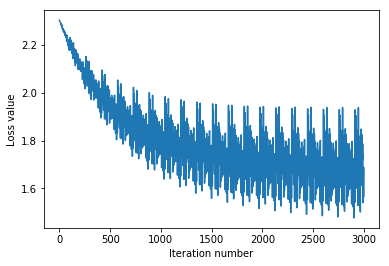

In [9]:
# A useful debugging strategy is to plot the loss as a function of
# iteration number:
plt.plot(stats['loss_history'])
plt.xlabel('Iteration number')
plt.ylabel('Loss value')

In [15]:
# Write the LinearSVM.predict function and evaluate the performance on both the
# training and validation set
y_train_pred = LC.predict(X_train)
print 'training accuracy: %f' % (np.mean(y_train == y_train_pred), )
y_val_pred = LC.predict(X_val)
print 'validation accuracy: %f' % (np.mean(y_val == y_val_pred), )

training accuracy: 0.721472
validation accuracy: 0.694695


In [11]:
# Use the validation set to tune hyperparameters (delta, regularization strength and
# learning rate). You should experiment with different ranges for the learning
# rates and regularization strengths; if you are careful you should be able to
# get a classification accuracy of about 0.4 on the validation set.
learning_rates = [1e-3, 1e-7, 5e-5]
regularization_strengths = [5e-3, 1e-5]

# results is dictionary mapping tuples of the form
# (delta, learning_rate, regularization_strength) to tuples of the form
# (training_accuracy, validation_accuracy). The accuracy is simply the fraction
# of data points that are correctly classified.
results = {}
best_val = -1   # The highest validation accuracy that we have seen so far.
best_LC = None # The LinearClassifier object that achieved the highest validation rate.

################################################################################
# TODO:                                                                        #
# Write code that chooses the best hyperparameters by tuning on the validation #
# set. For each combination of hyperparameters, train a linear Classifier on   #
# the training set, compute its accuracy on the training and validation sets,  #
# and store these numbers in the results dictionary. In addition, store the    #
# best validation accuracy in best_val and the LinearClassifier object that    #
# achieves this accuracy in best_svm.                                          #
#                                                                              #
# Hint: You should use a small value for num_iters as you develop your         #
# validation code so that the models don't take much time to train; once you   #
# are confident that your validation code works, you should rerun the          #
# validation  code with a larger value for num_iters.                          #
################################################################################

for lr in learning_rates:
    for rs in regularization_strengths:
        LC = LinearClassifier(input_size, output_size)
        stats = LC.train(X_train, y_train, X_val, y_val, learning_rate=lr, reg=rs,
                  num_iters=2000, batch_size=32, loss='xentropy', verbose=False)
        if stats['val_acc_history'][-1] > best_val:
            best_val = stats['val_acc_history'][-1]
            best_LC = LC
        results[(lr, rs)] = stats['train_acc_history'][-1], stats['val_acc_history'][-1]
################################################################################
################################################################################
#                              END OF YOUR CODE                                #
################################################################################
    
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print 'lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy)
    
print 'best validation accuracy achieved during cross-validation: %f' % best_val

lr 1.000000e-07 reg 1.000000e-05 train accuracy: 0.093750 val accuracy: 0.145145
lr 1.000000e-07 reg 5.000000e-03 train accuracy: 0.125000 val accuracy: 0.126126
lr 5.000000e-05 reg 1.000000e-05 train accuracy: 0.718750 val accuracy: 0.692693
lr 5.000000e-05 reg 5.000000e-03 train accuracy: 0.718750 val accuracy: 0.691692
lr 1.000000e-03 reg 1.000000e-05 train accuracy: 0.812500 val accuracy: 0.732733
lr 1.000000e-03 reg 5.000000e-03 train accuracy: 0.812500 val accuracy: 0.733734
best validation accuracy achieved during cross-validation: 0.733734


Text(0.5,1,'MNIST validation accuracy')

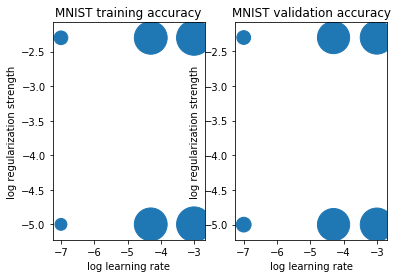

In [12]:
# Visualize the cross-validation results
import math
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

# plot training accuracy
sz = [results[x][0]*1500 for x in results] # default size of markers is 20
plt.subplot(1,2,1)
plt.scatter(x_scatter, y_scatter, sz)
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('MNIST training accuracy')

# plot validation accuracy
sz = [results[x][1]*1500 for x in results] # default size of markers is 20
plt.subplot(1,2,2)
plt.scatter(x_scatter, y_scatter, sz)
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('MNIST validation accuracy')

In [13]:
# Evaluate the best model on test set
y_test_pred = best_LC.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print 'linear classifier on raw pixels final test set accuracy: %f' % test_accuracy

linear classifier on raw pixels final test set accuracy: 0.736737


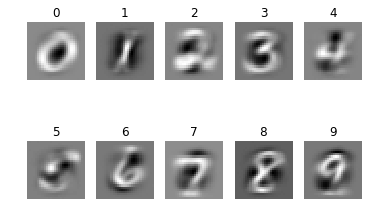

In [14]:
# Visualize the learned weights for each class.
# Depending on your choice of learning rate and regularization strength, these may
# or may not be nice to look at.
w = best_LC.params['W'][:,:-1] # strip out the bias

w = w.reshape(10, 28, 28)
w_min, w_max = np.min(w), np.max(w)
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
for i in xrange(10):
  plt.subplot(2, 5, i + 1)
    
  # Rescale the weights to be between 0 and 255
  wimg = 255.0 * (w[i].squeeze() - w_min) / (w_max - w_min)
  plt.imshow(wimg.astype('uint8'))
  plt.axis('off')
  plt.title(classes[i])